In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get data

In [2]:
startlist = pd.read_csv("../data/vasaloppet_2023_startlist.csv")
results = pd.read_csv("../data/vasaloppet_2023.csv")

In [3]:
df = pd.merge(startlist, results, left_on=["Name", "Age class"], right_on=["Name", "Age class"])

In [4]:
df.head()

,Name,Age class,Start group,Team,Place (gender),Time
0,"A. Jönsson, Alexander (SWE)",H35,VL4,Alvesta SOK,2039,05:46:07
1,"Aaby, Jacqueline (SWE)",D35,VL10,AXA SC,1932,11:44:04
2,"Aadusaar, Markus (SWE)",H21,VL10,Alnö Race Team,7556,09:19:38
3,"Aagaard, Peter (DEN)",H65,VL7,"<span class=""text-muted"">–</span>",5767,07:59:28
4,"Aagaard, Thomas (DEN)",H55,VL5,"<span class=""text-muted"">–</span>",3206,06:28:06


In [5]:
duplicates = df.duplicated(subset=["Name", "Age class", "Place (gender)", "Time"])
df.loc[duplicates]
# Could be due to changing team and/or start group?

,Name,Age class,Start group,Team,Place (gender),Time
224,"Andersson, Agnes (SWE)",D21,VL9,SK Bore Torsby,155,06:08:33
229,"Andersson, Alexander (SWE)",H21,VL7,Redvägs SK,4775,07:22:31
230,"Andersson, Alexander (SWE)",H21,VL7,AXA SC,5066,07:32:54
239,"Andersson, Andreas (SWE)",H21,VL2,IF Hagen SK,551,04:39:36
240,"Andersson, Andreas (SWE)",H21,VL2,Trollhättans SOK,9052,10:46:22
...,...,...,...,...,...,...
11084,"Svensson, Oskar (SWE)",H21,VL0,Björnstorps IF,7888,09:34:13
11092,"Svensson, Peter (SWE)",H35,VL4,Magra IS,2023,05:45:38
11093,"Svensson, Peter (SWE)",H35,VL4,Linköpings SK,2841,06:15:09
11112,"Svensson, Viktor (SWE)",H21,VL9,Hälle IF,6936,08:49:56


In [6]:
df.drop_duplicates(subset=["Name", "Age class", "Place (gender)", "Time"], inplace=True)
df.shape
# Seems about right! 

(12075, 6)

## Data cleaning

In [7]:
df[["hours", "minutes", "seconds"]] = df.Time.str.split(":", expand=True)
df.head()

,Name,Age class,Start group,Team,Place (gender),Time,hours,minutes,seconds
0,"A. Jönsson, Alexander (SWE)",H35,VL4,Alvesta SOK,2039,05:46:07,05,46,07
1,"Aaby, Jacqueline (SWE)",D35,VL10,AXA SC,1932,11:44:04,11,44,04
2,"Aadusaar, Markus (SWE)",H21,VL10,Alnö Race Team,7556,09:19:38,09,19,38
3,"Aagaard, Peter (DEN)",H65,VL7,"<span class=""text-muted"">–</span>",5767,07:59:28,07,59,28
4,"Aagaard, Thomas (DEN)",H55,VL5,"<span class=""text-muted"">–</span>",3206,06:28:06,06,28,06


In [8]:
df["time_hours"] = df["hours"].astype(float) + df["minutes"].astype(float) / 60 + df["seconds"].astype(float) / (60*60)
df.head()

,Name,Age class,Start group,Team,Place (gender),Time,hours,minutes,seconds,time_hours
0,"A. Jönsson, Alexander (SWE)",H35,VL4,Alvesta SOK,2039,05:46:07,05,46,07,5.768611
1,"Aaby, Jacqueline (SWE)",D35,VL10,AXA SC,1932,11:44:04,11,44,04,11.734444
2,"Aadusaar, Markus (SWE)",H21,VL10,Alnö Race Team,7556,09:19:38,09,19,38,9.327222
3,"Aagaard, Peter (DEN)",H65,VL7,"<span class=""text-muted"">–</span>",5767,07:59:28,07,59,28,7.991111
4,"Aagaard, Thomas (DEN)",H55,VL5,"<span class=""text-muted"">–</span>",3206,06:28:06,06,28,06,6.468333


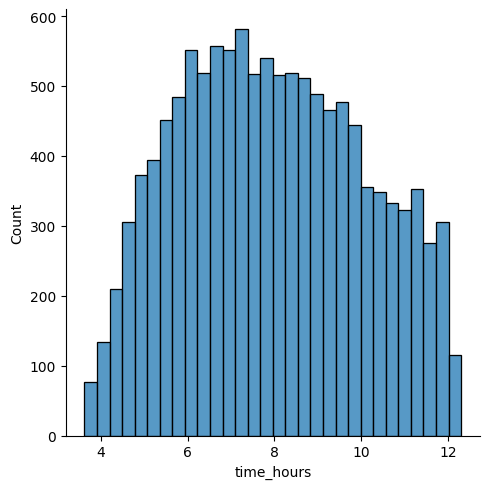

In [9]:
sns.displot(data=df, x="time_hours")

In [10]:
df["gender"] = df["Age class"].str[0]
df.tail()

,Name,Age class,Start group,Team,Place (gender),Time,hours,minutes,seconds,time_hours,gender
12725,"Øybø, Espen (NOR)",H35,VL10,"<span class=""text-muted"">–</span>",6967,08:51:39,08,51,39,8.860833,H
12726,"Öyen, Inge (NOR)",H55,VL3,"<span class=""text-muted"">–</span>",1214,05:12:21,05,12,21,5.205833,H
12727,"Öyre Slind, Astrid (NOR)",D35,VL0,Team Aker Daehlie,5,04:11:22,04,11,22,4.189444,D
12728,"Öyre Slind, Silje (NOR)",D35,VL0,Team Aker Daehlie,2,04:06:41,04,06,41,4.111389,D
12729,"Þórólfsdóttir, Sigríður Drífa (ISL)",D40,VL10,"<span class=""text-muted"">–</span>",1448,10:22:43,10,22,43,10.378611,D


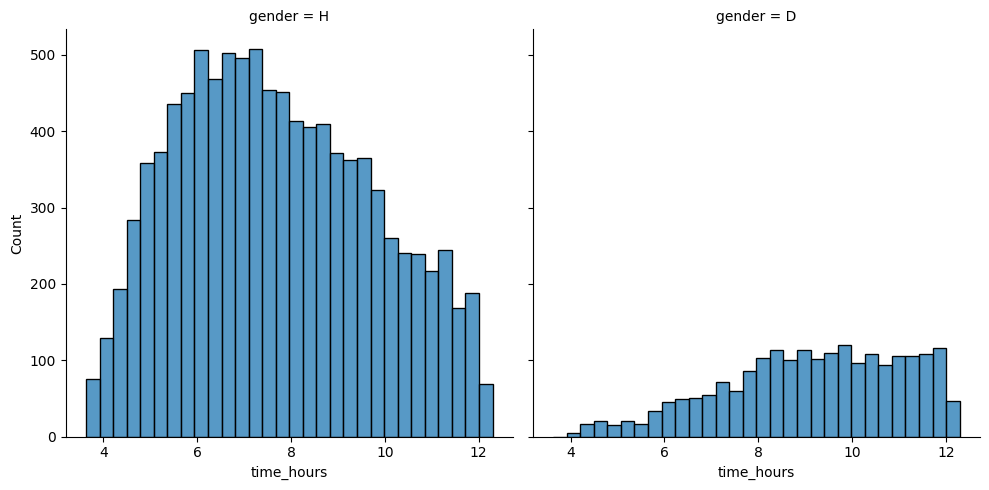

In [15]:
sns.displot(data=df.loc[df.gender != "<"], x="time_hours", col="gender")

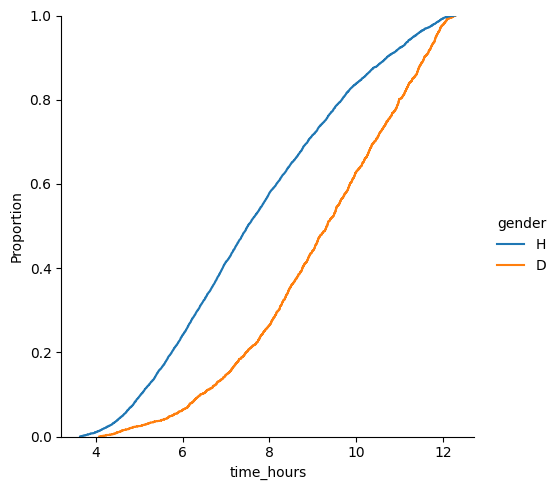

In [12]:
sns.displot(data=df.loc[df.gender != "<"], x="time_hours", hue="gender", kind="ecdf")

In [13]:
df["Place (total)"] = df["time_hours"].rank(method="first")
df.sort_values("time_hours").tail()

,Name,Age class,Start group,Team,Place (gender),Time,hours,minutes,seconds,time_hours,gender,Place (total)
5604,"Johnsson, Emma (SWE)",D21,VL10,Bravura Sports Club,2083,12:16:56,12,16,56,12.282222,D,12071.0
8464,"Norberg, Lars (SWE)",H50,VL10,Matfors SK,9991,12:16:57,12,16,57,12.282500,H,12072.0
2412,"Einarsson, Martin (SWE)",H21,VL10,AXA SC,9992,12:17:42,12,17,42,12.295000,H,12073.0
11547,"Tran, Phiphi (SWE)",D21,VL10,AXA SC,2084,12:17:43,12,17,43,12.295278,D,12075.0
8231,"Nguyen, Dan (SWE)",H21,VL10,AXA SC,9993,12:17:43,12,17,43,12.295278,H,12074.0


In [39]:
df.loc[df["Name"].isin(["Pihl, Morgan (SWE)", "Ström, Tobias (SWE)", "Ström, Philip (SWE)", "Nåbo, Joel (SWE)"])]
# Total place matches vasaloppet.se!

,Name,Age class,Start group,Team,Place (gender),Time,hours,minutes,seconds,time_hours,gender,Place (total)
8726,"Nåbo, Joel (SWE)",H21,VL7,Sya SK,6509,08:31:30,08,31,30,8.525000,H,7264.0
9432,"Pihl, Morgan (SWE)",H35,VL8,AXA SC,6546,08:33:34,08,33,34,8.559444,H,7310.0
10785,"Ström, Philip (SWE)",H35,VL7,IFK Mora SK,7403,09:11:37,09,11,37,9.193611,H,8402.0
10786,"Ström, Tobias (SWE)",H35,VL5,Nacka Värmdö SK,4882,07:26:28,07,26,28,7.441111,H,5294.0


In [32]:
# Percentile Morgan
(df["time_hours"] < 8.56).mean()

0.6054658385093168

In [33]:
# Percentile men Morgan
6546 / 9991

0.6551896707036333

In [35]:
# Percentile all Morgan
7310 / (9991 + 2084)

0.6053830227743271

## Analysis by start group

In [21]:
START_GROUPS = ["VL0", "VL1", "VL2", "VL3", "VL4", "VL5", "VL6", "VL7", "VL8", "VL9", "VL10"]

In [29]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

df.groupby("Start group").agg({"time_hours": ["count", "mean", "std", q1, "median", q3]}).loc[START_GROUPS].round(1)

time_hours                             
                 count  mean  std   q1 median    q3
Start group                                        
VL0                325   4.2  0.5  4.0    4.1   4.4
VL1                416   4.7  0.5  4.5    4.6   4.8
VL2                625   5.1  0.5  4.9    5.1   5.3
VL3                924   5.7  0.6  5.4    5.6   5.9
VL4               1088   6.3  0.7  5.9    6.2   6.4
VL5               1224   7.0  0.9  6.5    6.8   7.2
VL6               1185   7.5  0.8  7.0    7.4   7.8
VL7               1249   8.1  0.9  7.6    8.0   8.5
VL8               1355   8.9  0.9  8.4    8.9   9.4
VL9               1205   9.9  1.0  9.2    9.8  10.6
VL10              2479  10.4  1.3  9.7   10.6  11.4

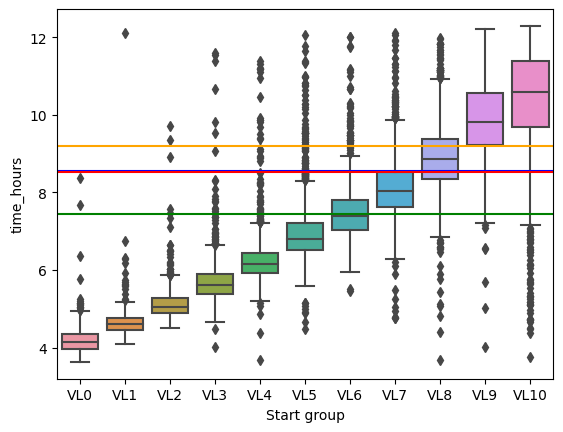

In [50]:
sns.boxplot(data=df, x="Start group", y="time_hours", order=START_GROUPS)
plt.hlines(y=8.56, xmin=-0.5, xmax=10.5, colors="blue")  # Morgan
plt.hlines(y=8.53, xmin=-0.5, xmax=10.5, colors="red")  # Joel
plt.hlines(y=7.44, xmin=-0.5, xmax=10.5, colors="green")  # Tobias
plt.hlines(y=9.19, xmin=-0.5, xmax=10.5, colors="orange")  # Philip

## Tolkning

* Seedningen är väldigt bra för startled 0-5 (inget överlapp för mittersta 50% i respektive startled)
* För startled 5-10 blir separationen mellan leden successivt sämre (stort överlapp mellan 9 och 10 framförallt - medianen för startled 10 är samma som 75 %ilen för startled 9)
* Det kan uppstå problem under loppet när åkare hamnar i "fel" startled - relativt långsamma åkare som blockerar spår och relativt snabba åkare som tvingas göra många passeringar
* Detta problem verkar vara störst för de högre startleden (5-9)
* Det går inte att göra mycket åt åkare som inte har åkt några seedningsgrundande lopp - vi vet ingenting om deras förmåga och måste placera dem i startled 10
* Det går heller inte att flytta upp åkare som har försämrats under försäsongen (åkte snabbare tidigare år än på seedningslopp under 2023 till exempel)
* Ytterligare en begränsning är att seedningen inte sätts individuellt utan utifrån tidsgränser som gäller för alla åkare för varje seedningsgrundande lopp


Vad som eventuellt skulle kunna förbättras är att placera relativt långsamma åkare (startled 5 och uppåt) i rätt led baserat på seedningslopp från 2023. Anekdotiskt verkar seedningen från Engelbrektsloppet ha varit sämre än seedningen från Moraloppet till exempel. 

Hur kan man bättre kalibrera seedningsloppen så att gränsvärdena för de olika startleden blir mer rättvisa och jämförbara?

Hur det verkar skötas idag:
* Utgå från vinnartiden för att dra gräns för första startledet 
* Utgå från kunskap om förmåga/meriter hos tätpersonerna för att dra gräns för det första startledet
* Sätta tidsgränser med jämna intervall (10, 15, 20 minuter) baserat på kunskap om väder/spårförhållanden (t.ex. om det snöade eller inte)

https://www.vasaloppet.se/wp-content/uploads/sites/1/2020/11/seedningslopp_vasaloppet_formular_for_arrangorer_2020.pdf

Möjliga förbättringar:
* Använda data (startled, sluttid, placering) från tidigare vasalopp för fler än tätpersonerna (VasaID ges vid anmälan till seedningslopp) för att avgöra var tidsgränserna borde vara
* Utgå från mediantid (eller kanske Q3) per startledsgrupp för varje lopp för att sätta tidsgränser
* Använd Bayes för att uppdatera uppskattad förmåga (hastighet?) efter varje lopp, sätt tidsgränser baserat på gruppering av uppskattad förmåga - fler lopp ger högre säkerhet

In [65]:
def percentile_for_group(time_hours: float, group: str) -> float:
    return (df.loc[df["Start group"] == group, "time_hours"] < time_hours).mean().round(2)

print(f"Tobias VL5: {percentile_for_group(7.44, 'VL5')}")
print(f"Tobias VL6: {percentile_for_group(7.44, 'VL6')}")
print(f"Joel VL7: {percentile_for_group(8.53, 'VL7')}")
print(f"Philip VL7: {percentile_for_group(9.19, 'VL7')}")
print(f"Morgan VL8: {percentile_for_group(8.56, 'VL8')}")
print(f"Morgan VL9: {percentile_for_group(8.56, 'VL9')}")


Tobias VL5: 0.82
Tobias VL6: 0.53
Joel VL7: 0.75
Philip VL7: 0.91
Morgan VL8: 0.34
Morgan VL9: 0.09


## Tolkning

* Tobias var långsammare än 82% av startled 5 (Vasaloppet 2022)
* Tobias var nära medianen av startled 6 (Moraloppet 2023)
* Joel var långsammare än 75% av startled 7 (Moraloppet 2023)
* Philip var långsammare än 91% av startled 7 (Moraloppet 2023)
* Morgan var snabbare än 66% av startled 8 (Vasaloppet 2022)
* Morgan var snabbare än 91% av startled 9 (Engelbrektsloppet 2023)


Sammanfattningsvis:
* Seedningen från Vasaloppet 2022 var optimistisk för Tobias och korrekt för Morgan
* Seedningen från Moraloppet 2023 var optimistisk för Joel och Philip och korrekt för Tobias
* Seedningen från Engelbrektsloppet 2023 var pessimistisk för Morgan

# Nästa steg

* Hämta resultat från Vasaloppet 2022
    * Gruppera deltagare så att de någorlunda stämmer överens med startled för Vasaloppet 2023?
    * Gruppera deltagare baserat på placering?
* Hämta resultat från Engelbrektsloppet 2023 och Moraloppet 2023
* För båda seedningslopp:
    * Länka samman resultat med Vasaloppet 2022
    * Visualisera samband mellan resultaten
    * Föreslå tidsgränser för startled till Vasaloppet 2023
    * Utvärdera seedningen baserat på resultat från Vasaloppet 2023